# 02.1 데이터와 행렬
- https://datascienceschool.net/view-notebook/cd600e9627cd4f16bc4f6078231ab28c/

In [1]:
import numpy as np
import matplotlib.pylab as plt

#### 우리가 다루는 데이터들을 표시하는 방법
1. Scala
2. Vector
3. Matrix
4. Tensor

## 01 Scala
- 하나의 숫자만으로 이루어진 데이터다.

- 보통 알파벳 소문자로 표기한다.

- 실수에 속한다

- $x \in \mathbf{R} \tag{2.1.1} $

## 02 Vector
- 개개의 데이터(scala)들이 묶여 있을 때 이를 나타내는 방법


- 보통 Column Vector로 표현한다.
    - Row Vector = Row 1 & Columns N
    - Columns Venctor = Row N & Columns 1


- 열 벡터의 Row가 N개일 때 이를 **N차원 Vector** 라고 부른다.
    \begin{align}
        x = \begin{bmatrix}
            x_{1} \\
            x_{2} \\
            \vdots \\
            x_{N} \\
        \end{bmatrix}
        \tag{2.1.3}
    \end{align}

    \begin{align}
        x \in \mathbf{R}^N
        \tag{2.1.4}
    \end{align}            


- 보통 데이터 분석 시에 많이 활용하는 대표적인 benchmark dataset 중 하나인 "Iris Dataset"을 통해 사례 확인

In [2]:
from sklearn.datasets import load_iris #사이킷런 패키지 임포트
iris = load_iris() # 아이리스 데이터센 로드

In [3]:
print('numpy array 형태 표기')
iris.data[0, :] # 첫번째 데이터 

numpy array 형태 표기


array([ 5.1,  3.5,  1.4,  0.2])

*(vector 형태 표기)*

 $x_{1}$ = $\begin{bmatrix}5.1\\3.5\\1.5\\0.2\end{bmatrix}$

In [4]:
iris.data[1, :] # 두번째 데이터 / Vector 값

array([ 4.9,  3. ,  1.4,  0.2])

*(vector 형태 표기)*

 $x_{2}$ = $\begin{bmatrix}4.9\\3.\\1.4\\0.2\end{bmatrix}$


- 예측 문제에서의 대부분 입력 데이터들은 Vector로 표시될 수 있다.
- 만약 Vector형태로 되어있지 않다고 하더라도 강제로 Vector화 하여 분석을 진행하곤 한다.
- ex. MINIST digit image dataset
  - image data는 2차원이지만, reshape하여 강제로 vector할 수 있다.
  

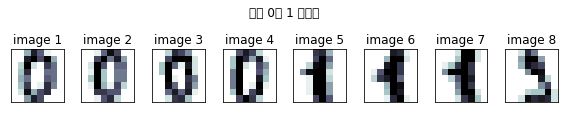

In [5]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.suptitle("숫자 0과 1 이미지")
plt.tight_layout()
plt.show()

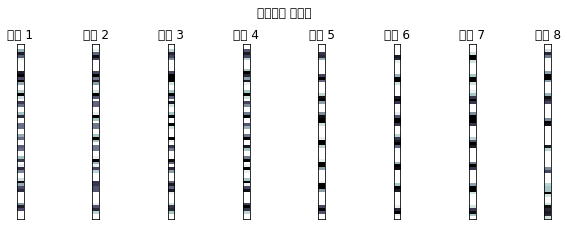

In [6]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 벡터화
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("벡터 {}".format(i + 1))
plt.suptitle("벡터화된 이미지", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

## 03 Matrix    
- 하나의 데이터들을 Vector로 표현했다면, 이러한 Data들의 Set를 나타내는 방법은 Vector들의 집합인 Matrix료 표현한다.
    - $X \in \mathbf{R}^{i*j}$


- Scala와 Vector들도 사실상 Matrix로 표현할 수 있다.
    - Scala: $x\in \mathbf{R} = \mathbf{R}^{1*1}$
    - Vector: $x\in \mathbf{R}^N = \mathbf{R}^{N*1}$
    

- 데이터를 Vector로 표시할 때는 관례상 하나의 열로 표현했지만 (Column Vector), Matrix로 표시할 때는 Row로 표시한다.
    - $x\in \mathbf{R}^N = \mathbf{R}^{N*1}$
    - $X \in \mathbf{R}^{i*j}$
        - i: vector의 개수
        - j: vector의 차원 (= N, vector를 구성하는 scala의 개수)

## 04 Tensor
- 데이터 사이언스에서는 Tensor를 같은 크기의 행렬이 여러개 묶여 있는 **다차원 배열**의 의미로  사용하곤 함
    - 수학적으로 엄밀한 정의는 아니지만, 관례상 사용


- Tensor 데이터의 예시: Color Image
- Width X Height X Color
    - 여기서 Color에 해당하는 행렬을 channel, depth 등으로 부름

In [7]:
from scipy import misc  # 패키지 임포트

img_rgb = misc.face()  # 컬러 이미지 로드
img_rgb.shape  # 데이터의 모양

(768, 1024, 3)

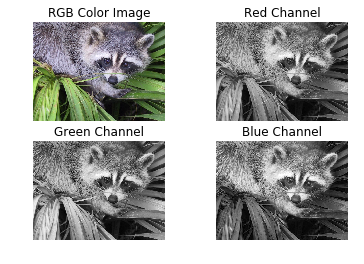

In [8]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB Color Image")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red Channel")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  # green 채널 출력
plt.axis("off")
plt.title("Green Channel")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  # blue 채널 출력
plt.axis("off")
plt.title("Blue Channel")

plt.show()

정확한 개념은 아니지만 얼추 다음과 비슷한 느낌?!

|차원|도형|선형대수 - 개념|선형대수 - 표시|
|-|-|-|-|
|0|점|Scala|$\mathbf{R}^{1*1}$|
|1|선|Vector|$\mathbf{R}^{N*1}$|
|2|면|Matrix|$\mathbf{R}^{i*j}$|
|3|공간|Tensor|$\mathbf{R}^{i*j*channel...}$|

#### 기타 이슈


1차원 Vector를 numpy에서는 보통 2차원의 배열(array)로 표기한다.
- "2차원 배열" 이라 함은 꺽쇠 안에 꺽쇠가 있다는 의미
- 보통 편의상 1차원으로 표현하곤 하나, 가끔 구분하는 프로그램이 존재하기도 함.
- 또한 1차원 배열은 Traspose연산이 안되는 반면, 엄밀하게 정확한 의미인 2차원 배열은 Transpose 연산도 가능하다.


Feature Vector / Matrix
- 예측문제에서 Input으로 사용하는 Vector 혹은 Matrix 값들을 Feature Vector(특징 벡터), Feature Matrix(특징 행렬) 이라고 한다.


#### 전치 연산 (Transpos)

In [9]:
a= np.array([[ 4.9,  3. ,  1.4,  0.2]])
a

array([[ 4.9,  3. ,  1.4,  0.2]])

In [10]:
b = np.array([[4.9], [3.], [1.4], [0.2]])
b

array([[ 4.9],
       [ 3. ],
       [ 1.4],
       [ 0.2]])

In [11]:
a.T

array([[ 4.9],
       [ 3. ],
       [ 1.4],
       [ 0.2]])

In [12]:
b.T

array([[ 4.9,  3. ,  1.4,  0.2]])

#### 행 표기법 & 열 표기법

\begin{align}
X 
=
\begin{bmatrix}
c_1 & c_2 & \cdots & c_M
\end{bmatrix}
=
\begin{bmatrix}
r_1^T  \\
r_2^T  \\ 
\vdots \\ 
r_N^T  \\  
\end{bmatrix}
\tag{2.1.19}
\end{align}

\begin{align}
X \in \mathbf{R}^{N\times M}
\tag{2.1.20}
\end{align}

\begin{align}
c_i \in \mathbf{R}^{N \times 1} \; (i=1,\cdots,M)
\tag{2.1.21}
\end{align}

\begin{align}
r_j^T \in \mathbf{R}^{1 \times M} \; (j=1,\cdots,N) 
\tag{2.1.22}
\end{align}

\begin{align}
X = 
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_1 \\ \phantom{\LARGE\mathstrut} \end{matrix}} & 
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_2 \\ \phantom{\LARGE\mathstrut} \end{matrix}} & 
\cdots &
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ c_M \\ \phantom{\LARGE\mathstrut} \end{matrix}} 
\end{bmatrix}
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & \phantom{} & r_1^T & \phantom{} & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & \phantom{} & r_2^T & \phantom{} & \phantom{} \end{matrix}} \\ 
\vdots \\ 
\boxed{\begin{matrix} \phantom{} & \phantom{} & r_N^T & \phantom{} & \phantom{} \end{matrix}} \\ 
\end{bmatrix}
\tag{2.1.23}
\end{align}

위의 식은 다음과 같은 명제를 수식으로 표현한 것이다.

> "행렬  X 의 각 열은  c1 ,  c2 ,  … ,  cM 라고 이름 붙인다."

> "행렬  X 는 열 벡터  c1 ,  c2 ,  … ,  cM 으로 이루어져 있다."

> "행렬  X 의 각 행은  rT1 ,  rT2 ,  … ,  rTN 라고 이름 붙인다."

> "행렬  X 는 행 벡터  rT1 ,  rT2 ,  … ,  rTN 으로 이루어져 있다."

모든 벡터는 기본적으로 열벡터이므로  ri 를 전치 연산하여  rTi 라고 행을 표현한 점에 주의한다.

#### 특수한 벡터와 행렬
|이름|name|numpy|
|-|-|-|
|영벡터		|zeros-vector			|np.zeros(*shape*)			|
|일벡터		|ones-vector			|np.ones(*shape*)			|
|정방행렬	|square matrix		|										-|
|대각행렬	|diagonal matrix	|np.diag(*[x1,x2,x3,...]*)	|
|항등행렬	|identity matrix		|np.identity(), np.eye()		|
|대칭행렬	|symmetric matrix	|									-	|


In [13]:
np.zeros((10,1))

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [14]:
np.ones((5,1))

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [15]:
np.diag([5,4,3,2,1])

array([[5, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1]])

In [16]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [17]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])